# IMDB 5000 Movie Data Set

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('./original/movie_metadata.csv/movie_metadata.csv', error_bad_lines=False)
df = df.drop_duplicates()
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

---

## 1. What's the probability that a movie was longer than an hour and a half? Two hours?

In [4]:
dur_hour_and_half = df[df['duration'] > 90]
dur_hour_and_half.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [5]:
perc_one = dur_hour_and_half.count() / df.count()
'percentage of movies over 90 minutes: {:.2f}%'.format(perc_one['duration'] * 100)

'percentage of movies over 90 minutes: 81.02%'

## 2. What's the probability that a movie was directed by Steven Spielberg?

In [6]:
speilberg_count = df[df.director_name == 'Steven Spielberg'].count()
speilberg_count['director_name']

26

In [7]:
total_movies = pd.DataFrame(df[['movie_title']]).count()

In [8]:
(speilberg_count / total_movies)['movie_title'] * 100

0.5202080832332933

## 3. What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [9]:
ce_busts = df[df.director_name == 'Clint Eastwood'][df.gross < df.budget].director_name.count()
ce_busts

/Users/sjschmidt/Codefellows/401/python/seattle-python-401d8/08-statistical-models/demos/00-code-review/ENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

In [10]:
ce_movies = df['director_name'][df.director_name == 'Clint Eastwood'].count()
ce_movies

20

In [11]:
ce_busts / ce_movies

0.35

## 4. What's the probability that a movie generally grossed more than its budget?

## 5. What's the probability that a movie grossed over the average gross of this data set?

## <font color='grey'>For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A **false positive** would be a movie that was highly-rated but did poorly in the box office (gross < budget). A **false negative** would be a movie that was poorly-rated but did great in the box office (gross > budget).</font>

## 6. In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

## 7. If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

## 8. Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

## 9. What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

## 10. How does the distribution of movie budgets compare to the movie gross values?

## 11. Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

## 12. Have any years grossed a statistically-significant higher amount than the other years?

----

## (STRETCH)  Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

## Profitability of movies against duration

In [21]:
df['profit'] = (df.gross - df.budget)[df.budget < 1e9]

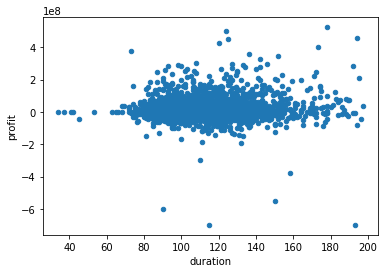

In [35]:
# df.duration[(df.duration < 200) & (df.duration > 30)].groupby(df.duration).count().plot()
pd.DataFrame(df[['profit', 'duration', 'movie_title']][(df.duration < 200) & (df.duration > 30)]).sort_values('duration').plot(x='duration', y='profit', kind='scatter')